In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.optimize import curve_fit
from scipy import constants as const

def conv(x):
    return x.replace(",", ".").encode()
%matplotlib inline

In [3]:
# 1. Kalibrieren der x-Achse, u_e Bestimmung 
# 2. Peaks in allen Messungen bestimmen und Zusammenhang plotten, ue Bestimmung 
# 3. Inhomogenität des Magnetfeldes bestimmen, del B delz Bestimmung 
# 4. Apparatekonstanten hinzufügen

In [4]:
bf1  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfiedl1")), delimiter ="\t", skip_header = 3))
bf2  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield2")), delimiter ="\t", skip_header = 3))
bf3  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield3")), delimiter ="\t", skip_header = 3))
bf4  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield4")), delimiter ="\t", skip_header = 3))
bf5  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield5")), delimiter ="\t", skip_header = 3))
bf6  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield6")), delimiter ="\t", skip_header = 3))
bf7  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield7")), delimiter ="\t", skip_header = 3))
bf8  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield8")), delimiter ="\t", skip_header = 3))
bf9  = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield9")), delimiter ="\t", skip_header = 3))
bf10 = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield10")), delimiter ="\t", skip_header = 3))
bf11 = np.array(np.genfromtxt((conv(x) for x in open("bfieldmeasures/bfield11")), delimiter ="\t", skip_header = 3))

bfields = [bf1,bf3,bf4,bf5,bf6,bf7,bf8,bf9,bf10,bf11]

In [9]:
xcalib = [(400,1000),(450,1000),(450,1000),(450,1000),(450,1000),(450,1000),(450,1000),(450,1000),(450,1000),(450,1000)]
ycalib = [(400,980),(450,983),(450,989),(450,990),(450,994),(450,996),(450,996),(450,996),(450,997),(450,997)]

def linear(m:float,b:float,x:np.ndarray):
    return m*x+b

bcalibrated =[]

for  i in range(len(xcalib)-10):
    popt,_ = curve_fit(linear,xcalib[i],ycalib[i])
    bcalibrated.append(popt[1]*bfields[i][:,0]+popt[0])
    
    #plt.plot(bfields[i][:,0],bfields[i][:,1], label="Daten vor Korrektur")
    #plt.plot(popt[1]*bfields[i][:,0]+popt[0],bfields[i][:,1],label="Daten nach der Korrektur")
    plt.plot(popt[1]*bfields[i][:,0]+popt[0],bfields[i][:,1],label="Messung "+str(i+1))
    plt.xlabel(r"Spindelschritte",fontsize = 12)
    plt.ylabel(r"Anzahl der Counts", fontsize = 12)
    plt.legend(loc=0)
    plt.grid(True)
    #plt.savefig("Plots/AlleMessungen.pdf")
    #plt.savefig("Plots/Korrektur-x-Achse.pdf")

In [29]:
#Berechnung des Messfehlers der Ofenposition (also x-Achse) in Mikrometern
a = 1
u_Ofen = np.sqrt(((a)/(2 * np.sqrt(3)))**2+(0.5)**2)

In [30]:
#Definition der Gauß Funktion
def doublegaussian(x: np.ndarray,
    a: float, mu1: float, sigma1: float,
    b: float, mu2: float, sigma2: float,
    y0: float): 
    return (
        y0
        + a * np.exp(-(np.abs(x-mu1)/(np.sqrt(2)*sigma1))**2)
        + b * np.exp(-(np.abs(x-mu2)/(np.sqrt(2)*sigma2))**2)
    )

In [31]:
#Fitten mit der Gauß-Funktion
def fitdoublegaussian(ap, uap, array,p0):
    #Array Import und Fit
    x,y = array.T[0:2]
    popt1,pcov1 = curve_fit(doublegaussian,x,y,p0=p0)
    
    #Abstand zum Mittelwert, Gewichteter Mittelwert
    mean = np.abs((popt1[1] - popt1[4])/2)
    #mean = np.abs((popt1[4] - popt1[1]*popt1[2] + popt1[4]*popt1[5])/(popt1[2]+popt1[5]))
    
    #Messfehler Mittelwert
    umean = np.sqrt(( popt1[2] )**2 + (popt1[5])**2)
    
    ap.append(mean)
    uap.append(umean)
    
    print("Peak1: "+str(popt1[1]),"+/-","Abweichung: "+str(popt1[2]),";","Peak2: "+str(popt1[4]),"+/-","Abweichung: "+str(popt1[5]))
    plt.scatter(x,y,label="data",s=2)
    plt.plot(x,doublegaussian(x,*popt1),label="fit"+str(i))
    plt.legend(loc=0)
    plt.xlabel(r"$u_e$")
    plt.grid(True)
    plt.show()
    #plt.savefig("doublegauß.png")

#plt.plot(np.arange(0,len(bf4[:,0])),bf4[:,1])
plt.plot(bf3[:,0],bf3[:,1])
plt.xlim(600,800)
plt.grid(True)
#plt.plot(np.arange(0,bf1[:,0]),bf1[:,1])

Peak1: 684.609268509044 +/- Abweichung: 34.002007085460406 ; Peak2: 775.6495187634439 +/- Abweichung: 25.87614046344912


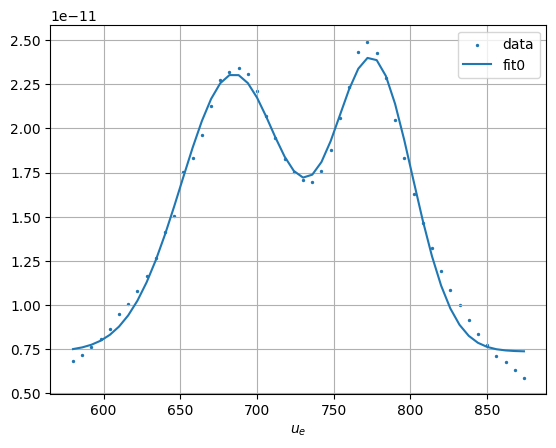

Peak1: 676.5924640966874 +/- Abweichung: 31.00214860771361 ; Peak2: 790.7639512384935 +/- Abweichung: 24.269612897760414


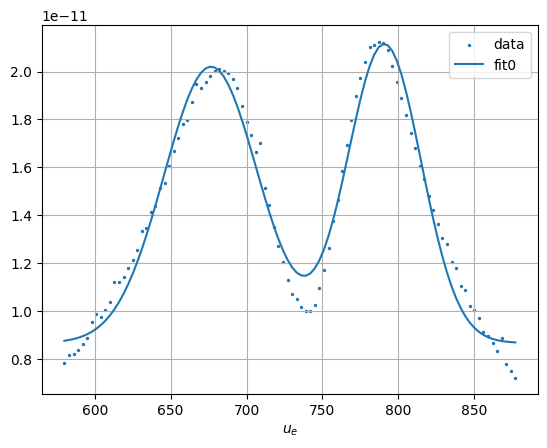

Peak1: 799.594177588304 +/- Abweichung: 24.238065558092412 ; Peak2: 673.8831521363201 +/- Abweichung: 30.562972906931016


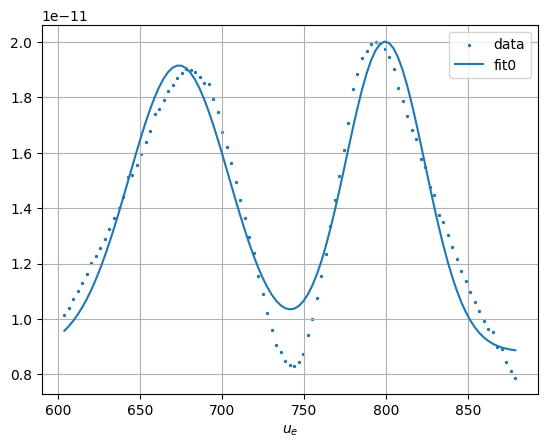

Peak1: 667.243061364192 +/- Abweichung: 30.635302737944848 ; Peak2: 795.5419761465953 +/- Abweichung: 24.583311266740154


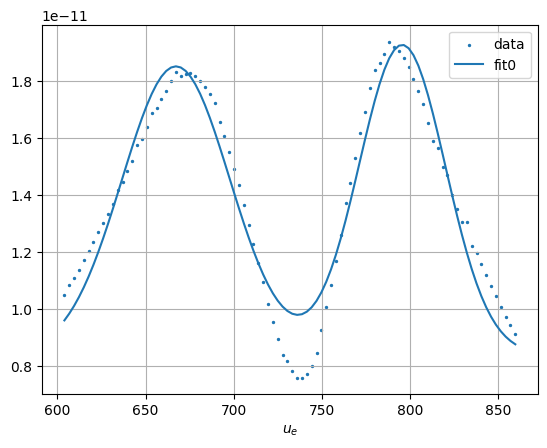

Peak1: 660.4110371796768 +/- Abweichung: 33.427394781202686 ; Peak2: 801.6138413268905 +/- Abweichung: 26.249092829529914


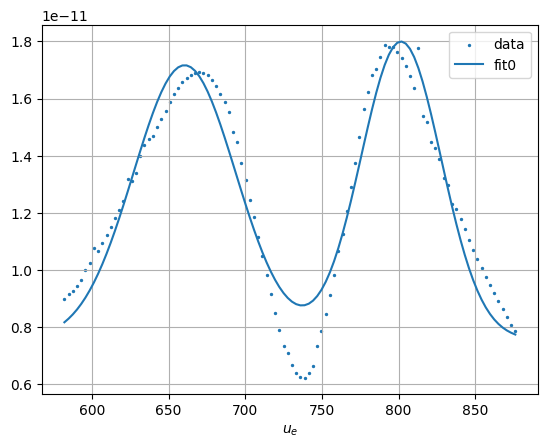

Peak1: 805.9948204014543 +/- Abweichung: 28.698544948412422 ; Peak2: 651.6459237364269 +/- Abweichung: 36.153862677584705


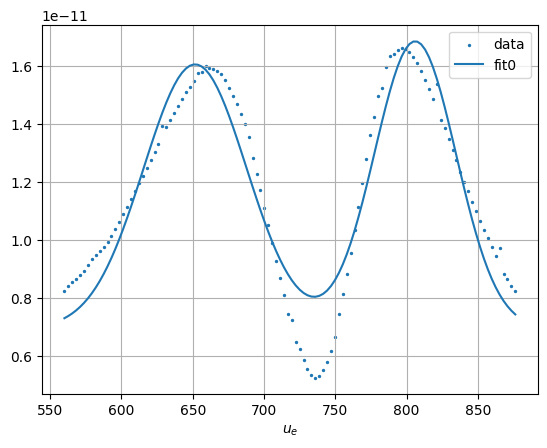

Peak1: 810.7133106808044 +/- Abweichung: 30.425740072184258 ; Peak2: 644.4064820853118 +/- Abweichung: 38.965232034337106


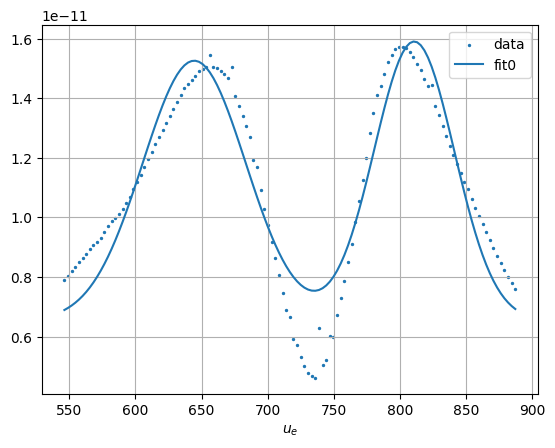

Peak1: 635.0805839423195 +/- Abweichung: 47.56838624037998 ; Peak2: 816.6216461790558 +/- Abweichung: 35.47649247082233


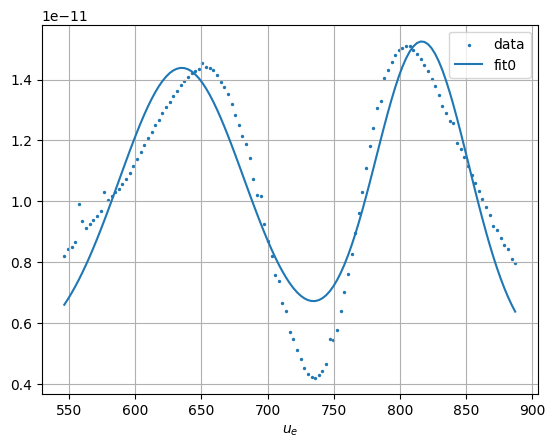

Peak1: 629.6921849903318 +/- Abweichung: 51.24904509269983 ; Peak2: 828.6875495349778 +/- Abweichung: 38.17434772943769


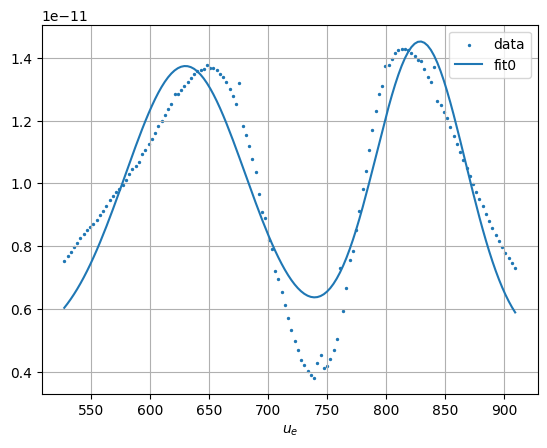

Peak1: 617.6809286767334 +/- Abweichung: 59.79611746000012 ; Peak2: 834.4241195015873 +/- Abweichung: 43.4728072362634


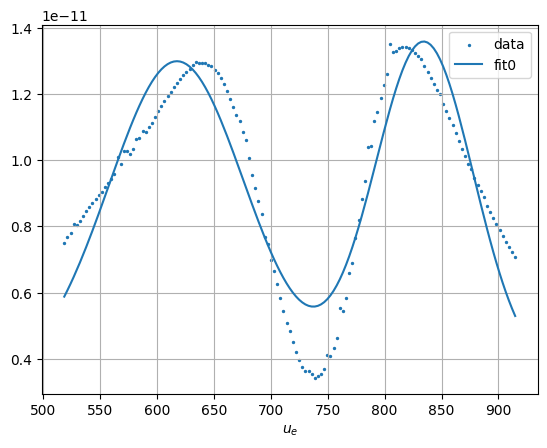

[45.52012512719995, 57.08574357090305, 62.85551272599196, 64.14945739120162, 70.60140207360683, 77.17444833251369, 83.15341429774628, 90.77053111836813, 99.497682272323, 108.37159541242693]
[42.72834107619729, 39.37191039944465, 39.007424099883664, 39.27926891736867, 42.501830504481276, 46.159595629356424, 49.43697974623702, 59.34081974110473, 63.904189592558055, 73.92875375854409]


In [42]:
ue = [] 
uue = []

fitdoublegaussian(ue,uue,bf1[30:80], (2.35*1e-11, 680, 30, 2.5*1e-11, 775, 30, 3e-12))
fitdoublegaussian(ue,uue,bf3[60:160], (2*1e-11, 712, 20, 2.1 *1e-11, 800, 40, 1e-11))
fitdoublegaussian(ue,uue,bf4[56:157], (2*1e-11, 790, 20, 2.1 *1e-11, 690, 40, 1e-11))
fitdoublegaussian(ue,uue,bf5[56:150], (1.8*1e-11, 675, 30, 1.9 *1e-11, 782,20, 21e-11))
fitdoublegaussian(ue,uue,bf6[48:156], (2*1e-11, 660, 40, 2.1 *1e-11, 770, 20, 0.6*1e-11))
fitdoublegaussian(ue,uue,bf7[40:156], (2*1e-11, 790, 20, 2.1 *1e-11, 690, 40, 1e-11))
fitdoublegaussian(ue,uue,bf8[35:160], (2*1e-11, 790, 20, 2.1 *1e-11, 690, 40, 1e-11))
fitdoublegaussian(ue,uue,bf9[35:160], (1.4 *1e-11, 650, 20, 2.1 *1e-11, 810, 40, 0.4 * 1e-11))
fitdoublegaussian(ue,uue,bf10[28:168], (2*1e-11, 645, 20, 2.1 *1e-11, 820, 40, 1e-11))
fitdoublegaussian(ue,uue,bf11[25:170], (1.2*1e-11, 630, 20, 1.25 *1e-11, 825, 40, 0.35*1e-11))

print(ue)
print(uue)


In [33]:
#all list & const. 
L = 0.07 # in m 
l = 0.455 #in m 
a = 0.0025 # in m

eps = 0.966   #epsilon Wert
ueps = 0.023  #epsilon Unsicherheit 

#Daten aus den Messungen
T = [458.15, 458.65,458.65,458.65,458.65,458.65,458.65,458.65,458.65,459.15]
I = [0.33,0.395,0.46,0.51,0.58,0.66,0.73,0.81,0.87,0.96]

#Unsicherheit von T
uTS = [0,1,1,1,1,1,1,1,1,0] #Schwankung der T 
uT1 = 0.29
#Schrittmotor
uSl = 0.29*10**(-5)
uS = np.sqrt(uSl**2)
#Spulenstrom
uA = 0.29
uIS = [0,1,0,0,0,0,0,0,0,0] #Schwankung von I 
uI = []
#B-Feld
B = []
uB = []
#Gradient des B-Feldes
dB = []
udB = []
#x&y sowie Unsicherheit von x&y
x = []
y = []
ux = []
uy = []

#Unsicherheit der Temperatur
for i in np.arange(0, len(uTS)):
    uT.append(np.sqrt((uT1)**2 + (uTS[i])**2))

#Unsicherheit von A
for i in np.arange(0,len(I)):
    uI.append(np.sqrt((uA)**2 + (uIS[i])**2))

#B-feld & Unsicherheit
for i in np.arange(0,len(I)):
    B.append(-0.00512 + 0.55713 * I[i]+0.26883 * I[i]**2 -0.24218 * I[i] **3)
    uB.append(np.sqrt(((0.55713 + 2 * 0.26883 * I[i]
                        - 3 * 0.24218 * I[i]**2) * uI[i])**2))
#Gradient des B-Feldes berechnen
for i in np.arange(0,len(B)):
    dB.append((B[i] * eps)/(a))
    udB.append(np.sqrt( ((eps)/(a)*uB[i])**2 + ((B[i]/a) * ueps)**2))

#x & y berechnen & Unsicherheiten
for i in np.arange(0,len(ue)):
    y.append(ue[i] * 10**(-5) * 6 * const.k * T[i])
    x.append(dB[i] * l * L *(1 - L/(2*l)))
    
    #uy.append(np.sqrt((6 * const.k * T[i] *uue[i]*10**(-5))**2+(ue[i]* 10**(-5) * 6 * const.k * uT[i])**2))
    #ux.append(np.sqrt((dB[i]**2 * l * L * (1 - L/(2* l)) * udB[i])**2))

plt.plot(x,y,".", label = "Daten Punkte")
cap,cap1 = curve_fit(linear,np.array(x),np.array(y))
plt.plot(x,linear(np.array(x),*cap), label= "Linearer Fit")
plt.xlabel(r"$\mathrm{T\cdot m}$")
plt.ylabel(r"$\mathrm{m\cdot J}$")
plt.legend(loc = 0)
plt.savefig("linearfit.pdf")
print(cap)

NameError: name 'uT' is not defined

In [34]:
#andere mgl der Messunsicheheit: 
newux = []
newuy = []
for i in range(T):
    newuy.append(np.sqrt((6 * const.k * T[i] *uue[i]*10**(-5))**2+(ue[i]* 10**(-5) * 6 * const.k * uT[i])**2))

    newux.append(np.sqrt(
           (((0.55713 + 2 * 0.26883 * I[i]- 3 * 0.24218 * I[i]**2) * uI[i]) * eps *l*L*(1-L/(2*l))/(a))**2
        +  ((-0.00512 + 0.55713 * I[i]+0.26883 * I[i]**2 -0.24218 * I[i] **3) * eps**2 * l * L (1-L/(2 *l))/(a)*ueps)**2
    ))

TypeError: 'list' object cannot be interpreted as an integer

In [11]:
f = ()/()

TypeError: unsupported operand type(s) for /: 'tuple' and 'tuple'